In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import pandas as pd
import glob
from PIL import Image

wd = '/home/yx2892/comp-lab-class/Week6/LT,2D_A/'

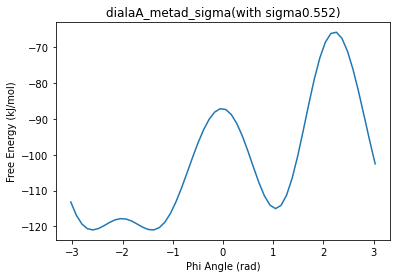

In [62]:
#phi,none,energy, none1, none2=np.loadtxt('__FILENAME__.grid.dat',skiprows=9)

data=pd.read_csv('sigma_phi_energy_A.grid.dat',header=0,names=['phi','energy','none2'],skiprows=5,sep='\s+')
# print pandas dataset
data
plt.plot(data.phi, -data.energy)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('dialaA_metad_sigma(with sigma0.552)')
plt.savefig('dialaA_metad_sigma')
plt.show()

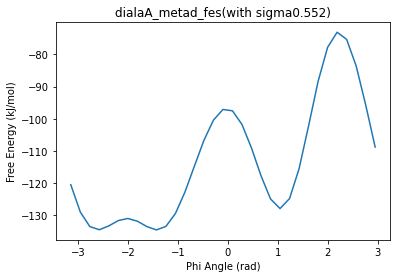

In [63]:
phi1, energy1, unknown= np.loadtxt('fes.dat', unpack=True)

plt.plot(phi1, energy1)

plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('dialaA_metad_fes(with sigma0.552)')
plt.savefig('dialaA_metad_fes')

plt.show()

After checking the document, The 1.1 scale is the constant we need to 

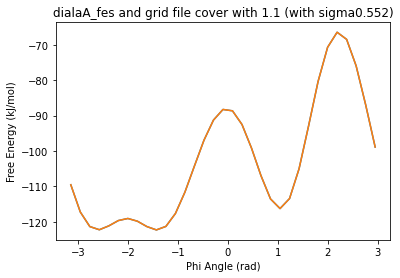

In [64]:
phi, energy, unknown= np.loadtxt('fes.dat', unpack=True)
plt.plot(phi, energy/1.1)
plt.plot(phi1, energy1/1.1)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('dialaA_fes and grid file cover with 1.1 (with sigma0.552)')
plt.savefig('dialaA_fes_cover_with_constant')
plt.show()


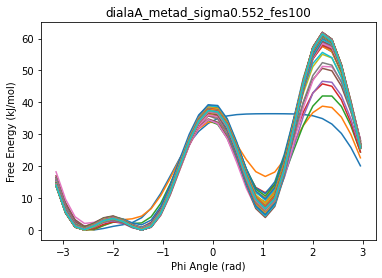

In [65]:
frames = []

for i in range(100):
    filename = f'fes_{i}.dat'
    phi, energy, unknown = np.loadtxt(filename, unpack=True)

    plt.plot(phi, energy)

    plt.xlabel('Phi Angle (rad)')
    plt.ylabel('Free Energy (kJ/mol)')
plt.title('dialaA_metad_sigma0.552_fes100')
plt.show()

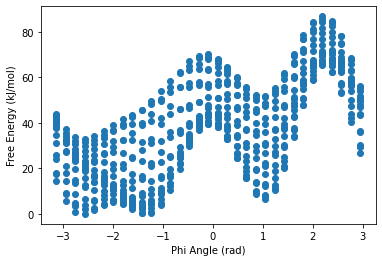

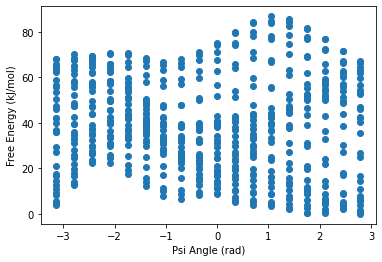

In [3]:
# plot an arbitrary surface for visualization purposes 

i=100
filename = f'fes_{i}.dat'


phi, psi, energy, unknown1, unknown2 = np.loadtxt(filename, unpack=True)

plt.scatter(phi, energy)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.show()

plt.scatter(psi, energy)
plt.xlabel('Psi Angle (rad)')
plt.ylabel('Free Energy (kJ/mol)')
plt.show()

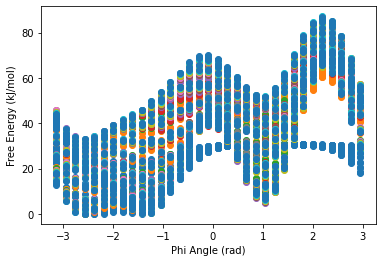

In [4]:
# make gif 

frames = []

for i in range(101):
    if i%10==0:
        filename = f'fes_{i}.dat'
        phi, psi, energy, unknown1, unknown2 = np.loadtxt(filename, unpack=True)

        plt.scatter(phi, energy)
        plt.xlabel('Phi Angle (rad)')
        plt.ylabel('Free Energy (kJ/mol)')

        savename = f'dialaB_2Dmetad_fes100_frame{i}'
        plt.savefig(savename)

        frame = [Image.open(image) for image in glob.glob(f"{savename}.png")]
        frames.append(frame[0])
    
frame_one = frames[0]
frame_one.save(f'{wd}/dialaA_2Dmetad_fes100.gif', format="GIF", append_images=frames,
           save_all=True, duration=100, loop=0)

plt.show()

[-3.14159265 -2.9511931  -2.76079354 -2.57039399 -2.37999443 -2.18959488
 -1.99919533 -1.80879577 -1.61839621 -1.42799666 -1.23759711 -1.04719755
 -0.856798   -0.66639844 -0.47599889 -0.28559933 -0.09519978  0.09519978
  0.28559933  0.47599889  0.66639844  0.856798    1.04719755  1.23759711
  1.42799666  1.61839621  1.80879577  1.99919533  2.18959488  2.37999443
  2.57039399  2.76079354  2.9511931 ]


<function matplotlib.pyplot.show(close=None, block=None)>

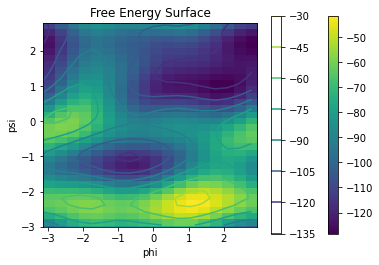

In [9]:
grid=np.loadtxt('fes.dat',skiprows=9)
gridPhi=np.zeros(33,dtype=float)
gridPsi=np.zeros(18,dtype=float)
gridE=np.zeros((33,18),dtype=float)
count=0
for i in range(18):
    gridPsi[i]=grid[count][1]
    for j in range(33):
        gridE[j][i]=grid[count][2]
        if(i==0):
            gridPhi[j]=grid[count][0]
        count+=1
InitialX=np.random.normal(2,1,20)
print(gridPhi)
H,xedges,yedges=np.histogram2d(InitialX,InitialX,bins=(gridPhi,gridPsi))
H=gridE
fig,ax=plt.subplots()
plt.imshow(H,extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.colorbar()
ax.set_title('Free Energy Surface')
plt.xlabel('phi')
plt.ylabel('psi')
plt.contour(gridPsi,-gridPhi,gridE)
ax.set_ylim(-3,2.8)
plt.colorbar()
plt.show